<a href="https://colab.research.google.com/github/GV-A/TASK-INTERN-CAREER/blob/main/Task_2___FinancialDistress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 50) # set the max_rows to a desired number to see all column properties
pd.set_option('display.max_columns', None) # set this to None to display all columns
figsize = [[],[]]
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize

In [6]:
filename = '/Financial Distress.csv'
dataset_raw = read_csv(filename)
names = list(dataset_raw.columns.values)
print(dataset_raw.head())
dataset_raw.shape

   Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7        x8        x9       x10      x11  \
0  0.060940  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   
1 -0.014080  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152   
2  0.020476  0.044865  0.43292 -0.081423 -0.765400 -0.054324  0.89314   
3  0.076037  0.091033  0.67546 -0.018807 -0.107910 -0.065316  0.89581   
4  0.199960  0.047800  0.74200  0.128030  0.577250  0.094075  0.81549   

       x12       x13      x14     x15       x16     x17       x18       x19  \
0  2.00580  0.125460   6.

(3672, 86)

In [7]:
# Removing columns that will not help the model's accuracy
DropColumns = ['Company', 'Time', 'x80']
dataset = dataset_raw.copy()
dataset.drop(DropColumns, axis=1, inplace=True)
print(dataset.head(10))
print(dataset.shape)

   Financial Distress       x1        x2       x3       x4        x5  \
0            0.010636  1.28100  0.022934  0.87454  1.21640  0.060940   
1           -0.455970  1.27000  0.006454  0.82067  1.00490 -0.014080   
2           -0.325390  1.05290 -0.059379  0.92242  0.72926  0.020476   
3           -0.566570  1.11310 -0.015229  0.85888  0.80974  0.076037   
4            1.357300  1.06230  0.107020  0.81460  0.83593  0.199960   
5            0.007188  1.05580  0.081916  0.87949  0.68673  0.142630   
6            1.200200  0.97059  0.076064  0.90677  0.80980  0.165920   
7            2.234800  1.05900  0.130200  0.81811  0.87599  0.234450   
8            1.340500  1.12450  0.147840  0.75871  1.07990  0.276440   
9            2.047400  1.59980  0.262460  0.54615  1.31270  0.369480   

         x6       x7        x8        x9       x10      x11       x12  \
0  0.188270  0.52510  0.018854  0.182790  0.006449  0.85822   2.00580   
1  0.181040  0.62288  0.006423  0.035991  0.001795  0.85152  

In [8]:
# Checking data types
dataset.dtypes

Financial Distress    float64
x1                    float64
x2                    float64
x3                    float64
x4                    float64
                       ...   
x78                   float64
x79                   float64
x81                   float64
x82                     int64
x83                     int64
Length: 83, dtype: object

In [9]:
# Checking the general summary of each columns
print(dataset.describe())

       Financial Distress           x1           x2           x3  \
count         3672.000000  3672.000000  3672.000000  3672.000000   
mean             1.040257     1.387820     0.129706     0.615769   
std              2.652227     1.452926     0.120013     0.177904   
min             -8.631700     0.075170    -0.258080     0.016135   
25%              0.172275     0.952145     0.048701     0.501888   
50%              0.583805     1.183600     0.107530     0.638690   
75%              1.351750     1.506475     0.188685     0.749425   
max            128.400000    51.954000     0.749410     0.967900   

                 x4           x5           x6           x7             x8  \
count  3.672000e+03  3672.000000  3672.000000  3672.000000    3672.000000   
mean   8.681599e-01     0.154949     0.106717     0.784031      39.274361   
std    5.719519e-01     0.124904     0.210555     1.033606    4305.688039   
min    5.350000e-07    -0.269790    -0.627750     0.035160 -145000.000000   
25

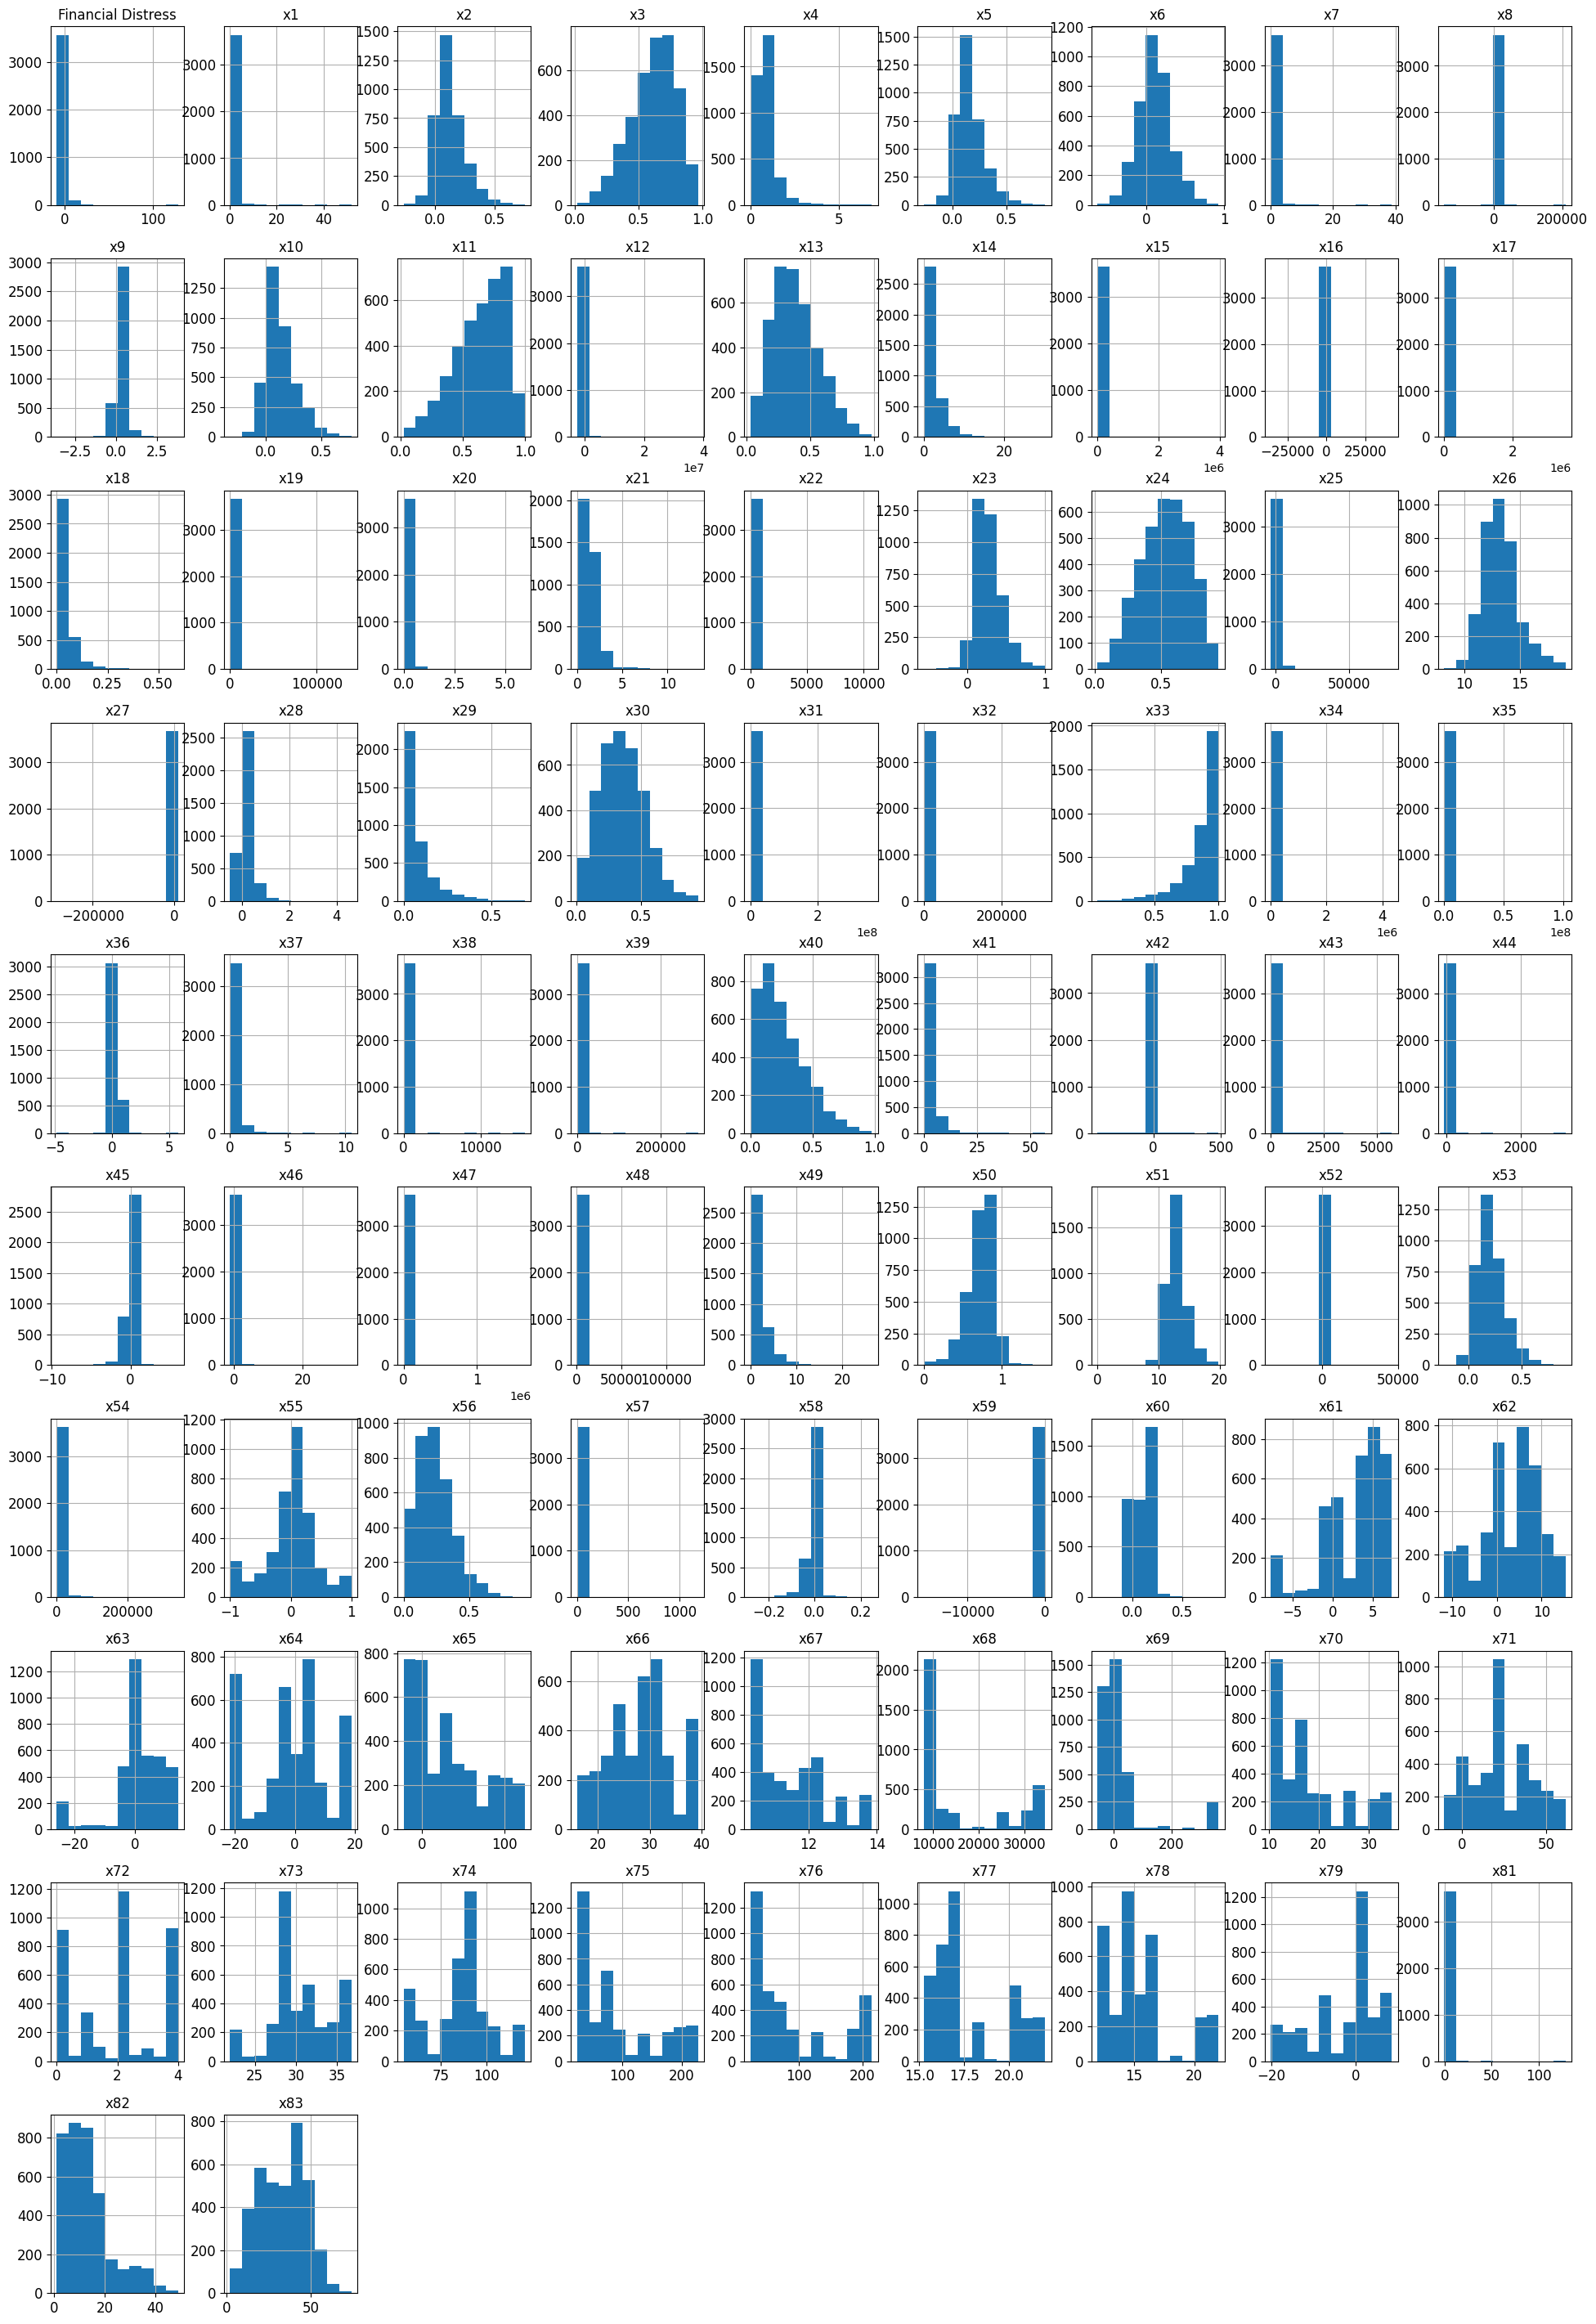

In [10]:
# Visualizing the data distribution
figsize[0] = 24
figsize[1] = 36
plt.rcParams['figure.figsize'] = figsize
dataset.hist(sharex=False, sharey=False, xlabelsize=12, ylabelsize=12)
plt.show()

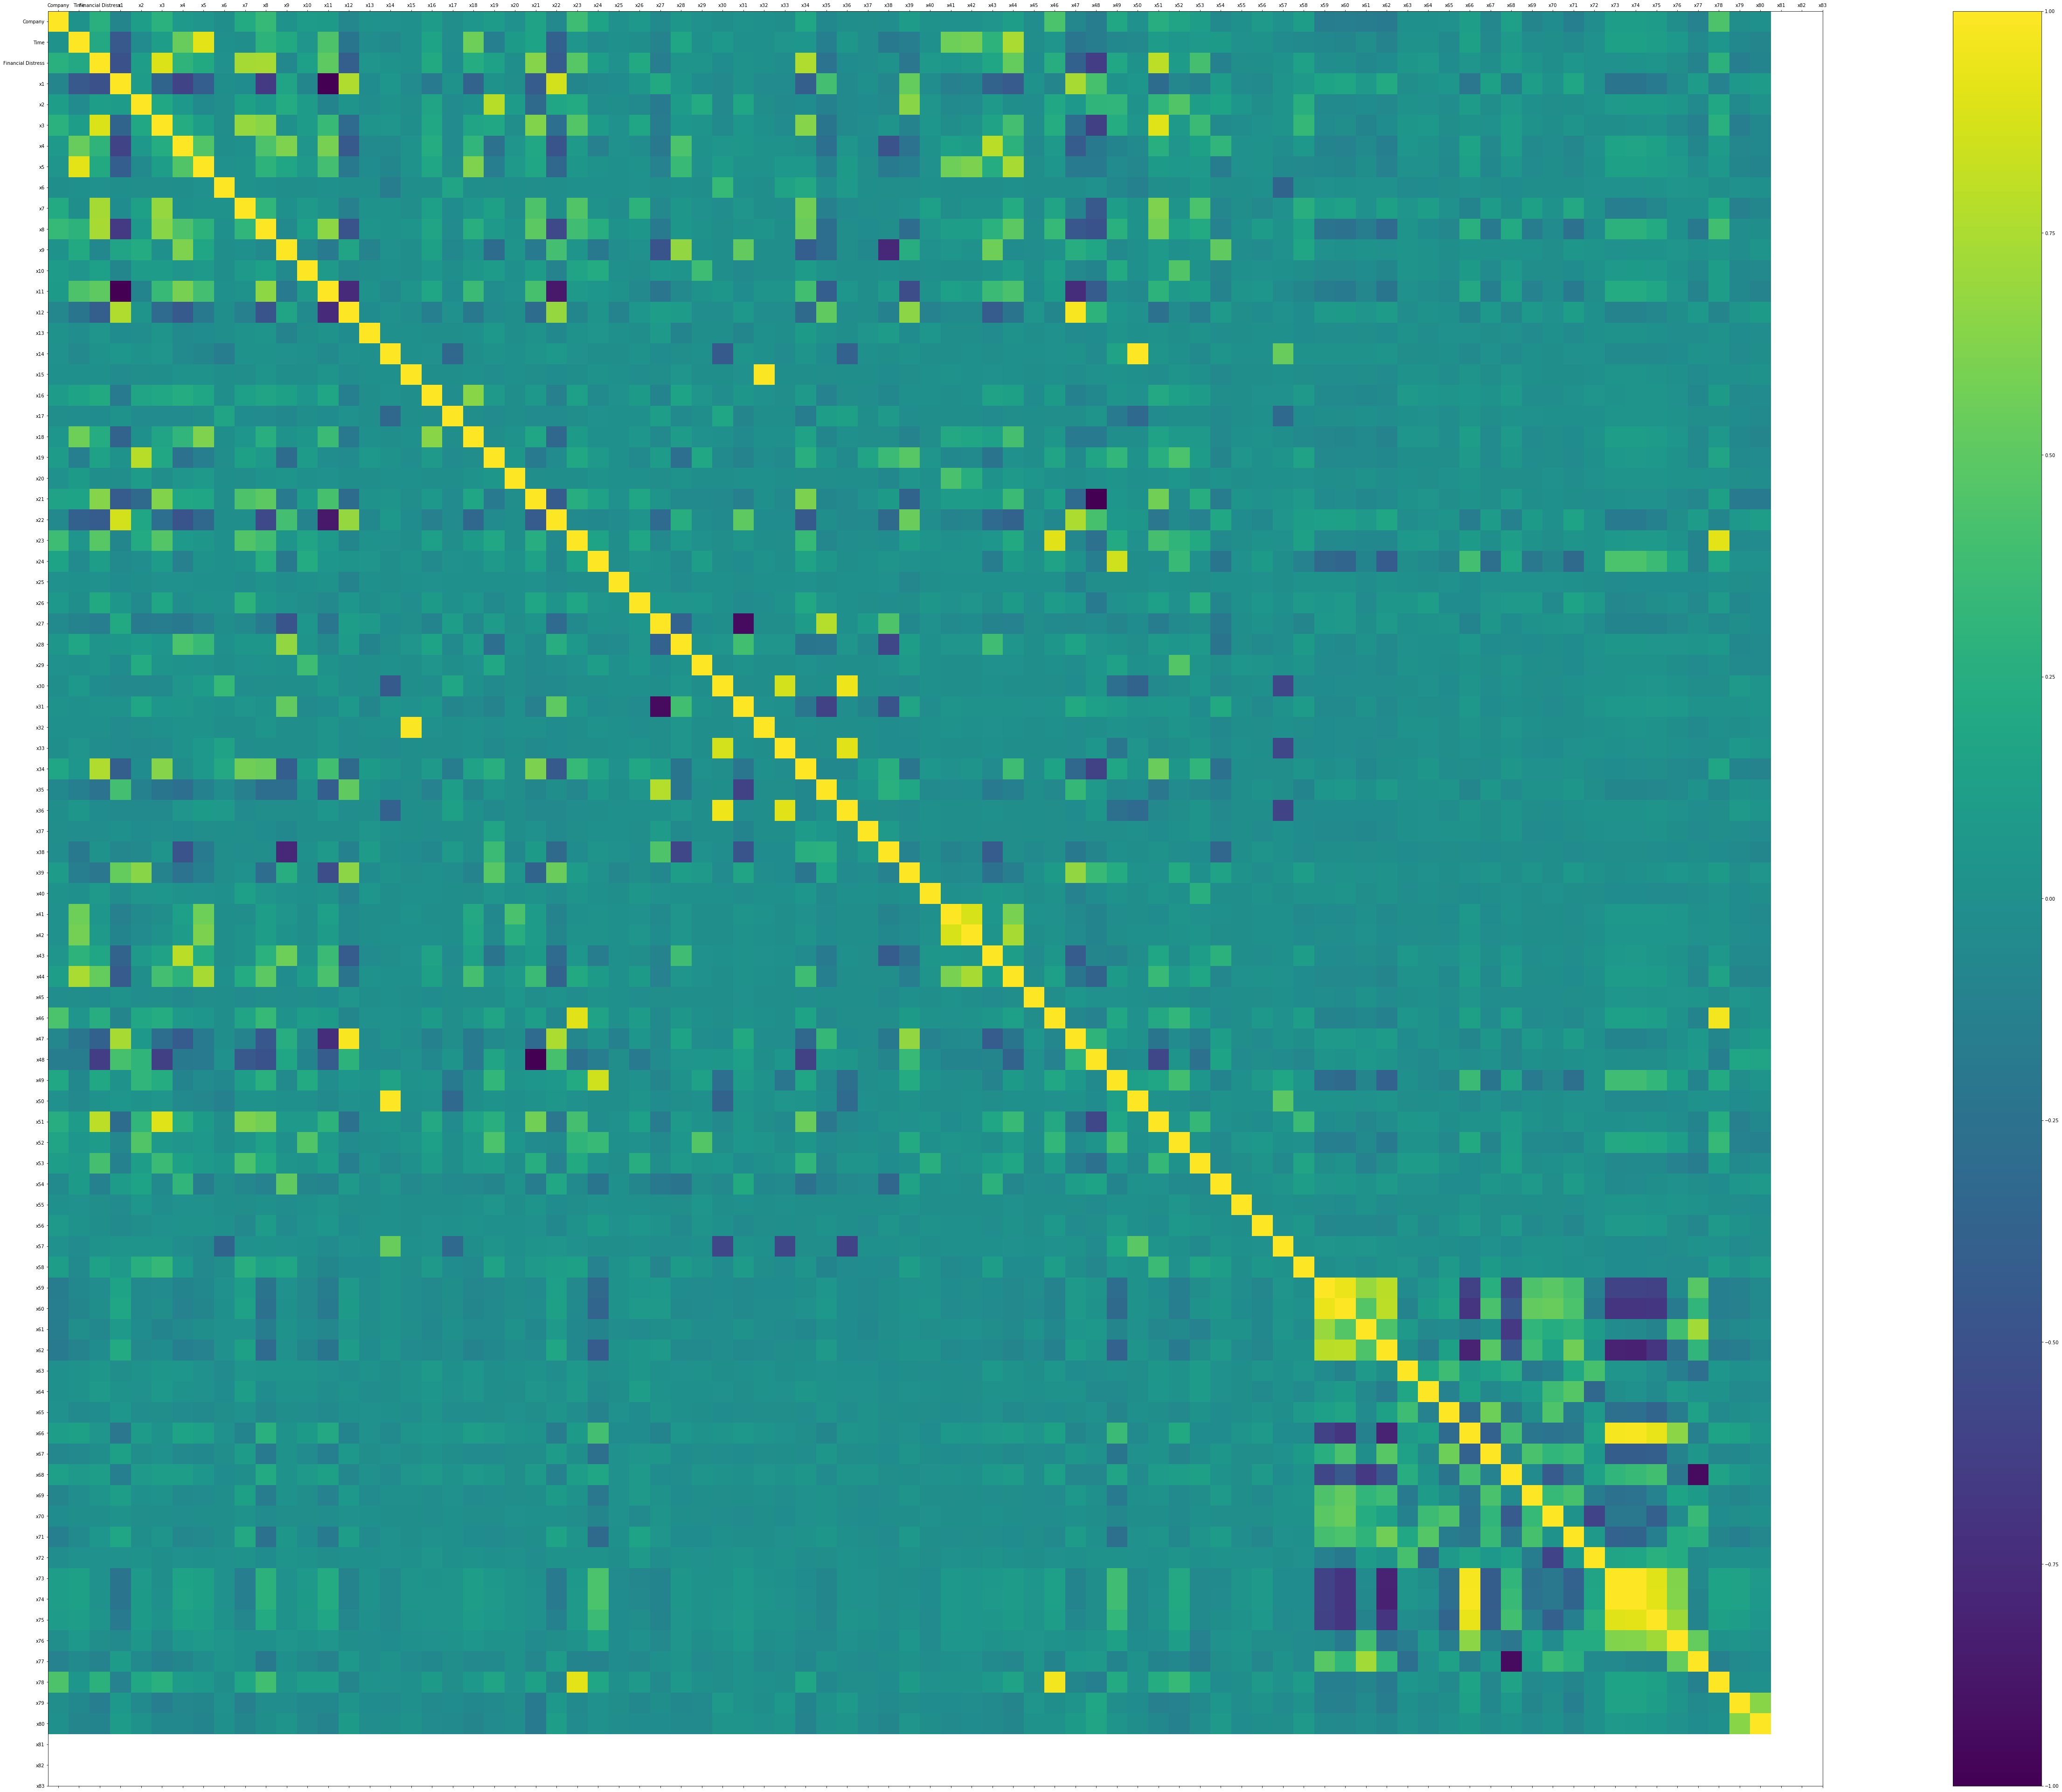

In [ ]:
# Visualizing the correlations
figsize[0] = 100
figsize[1] = 70
plt.rcParams['figure.figsize'] = figsize
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,86,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [19]:
#Engineer new features or transform existing ones for better model performance.

dataset['x_squared'] = dataset['x1']*dataset['x1']
dataset['x_squared']


0       0.005407
1       0.006578
2       0.053151
3       0.035761
4       0.050210
          ...   
3667    0.360862
3668    0.155945
3669    0.049154
3670    0.013885
3671    0.024412
Name: x_squared, Length: 3672, dtype: float64

In [26]:
dataset['FD1'] = dataset['Financial Distress']*dataset['x1']
dataset['FD1']


0       0.028549
1       0.045759
2       0.118725
3       0.114584
4      -0.026789
          ...   
3667   -0.136423
3668   -0.083071
3669   -0.045103
3670   -0.019072
3671   -0.030732
Name: FD1, Length: 3672, dtype: float64

In [27]:
# Splitting the dataset into validation set (30% [a requirement by the stakeholder]
array = dataset.values
X = array[:, 1:82]
Y = array[:, 0]
validation_size = 0.30
seed = 3
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [29]:
num_folds = 10
scoring = 'neg_mean_squared_error'

In [30]:
# Initial test to identify high performing algorithms
models = []
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [31]:
InitialResults = []
InitialNames = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    InitialResults.append(cv_results)
    InitialNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

LASSO: -0.39357816021557057 (0.09464312537442869)
EN: -0.39357816021557057 (0.09464312537442869)
KNN: -0.24042590899348118 (0.08987118111885646)
CART: -0.30040368908517207 (0.140048629723731)
SVR: -0.21199785181514091 (0.08453493983433698)


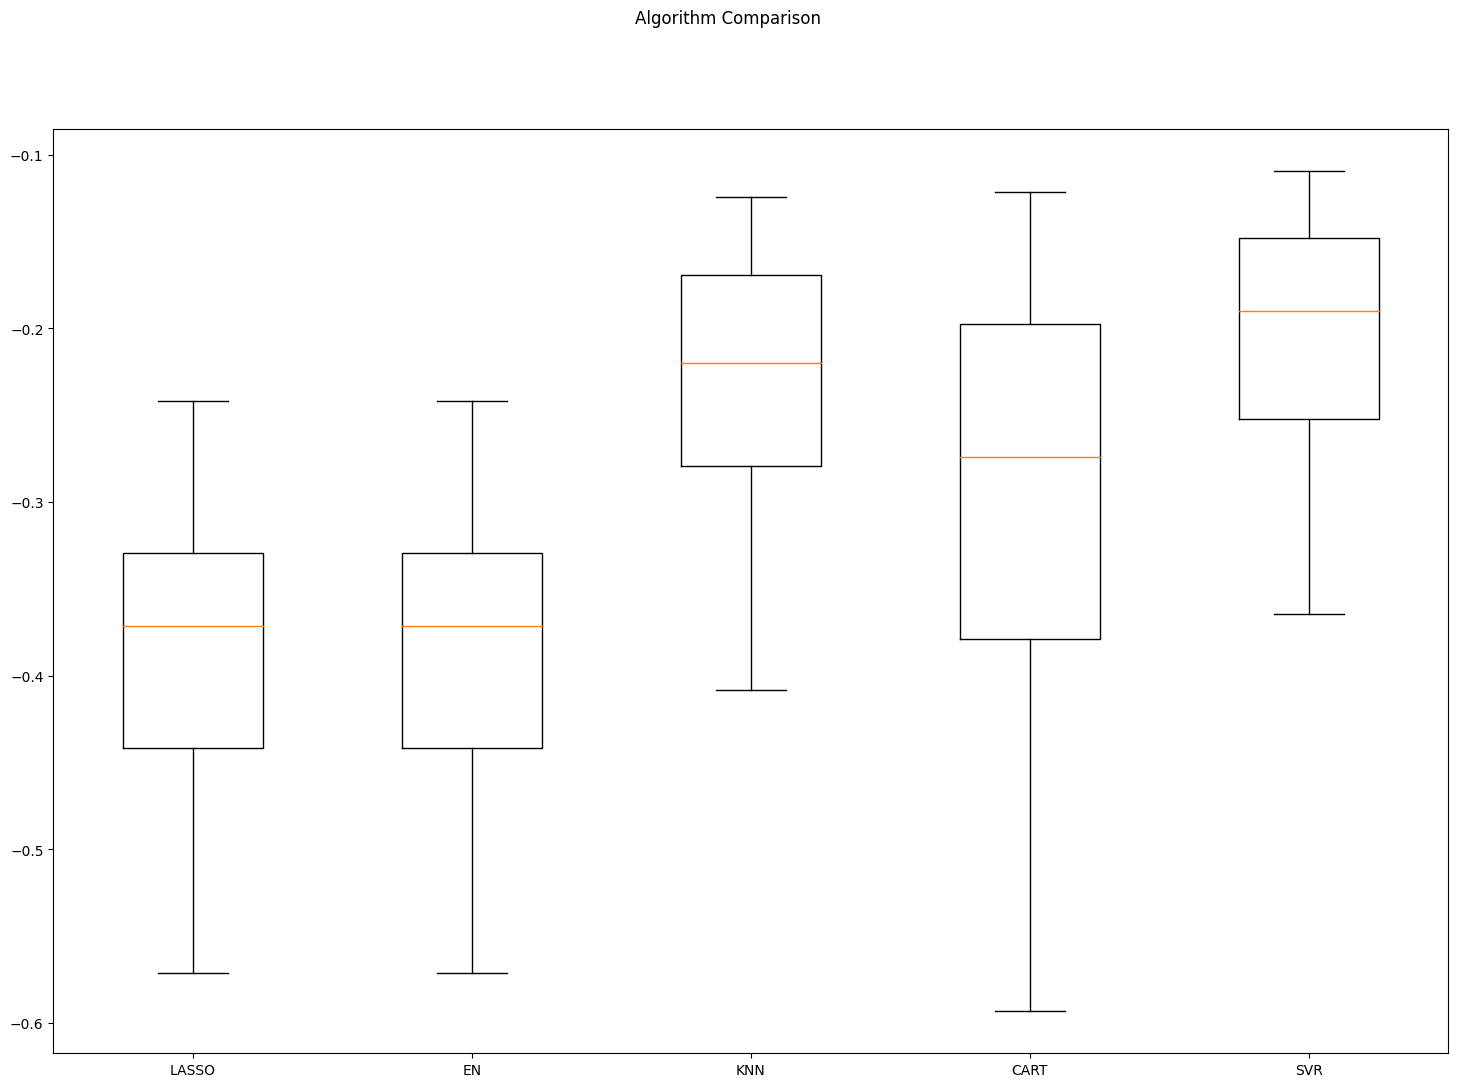

In [32]:
# Visualizing the results
figsize[0] = 18
figsize[1] = 12
plt.rcParams['figure.figsize'] = figsize
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(InitialResults)
ax.set_xticklabels(InitialNames)
plt.show()

In [33]:
# Standardizing the data
pipelines = []
# pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('CART', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('ScaledCART', StandardScaler()), ('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))
ScaledResults = []
ScaledNames = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    ScaledResults.append(cv_results)
    ScaledNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

ScaledLASSO: -0.39357816021557057 (0.09464312537442869)
ScaledEN: -0.39357816021557057 (0.09464312537442869)
ScaledKNN: -0.1975013878407424 (0.05419578592970954)
ScaledCART: -0.33047170972553824 (0.1450582559946958)
ScaledSVR: -0.1457666390362866 (0.05260064958473322)


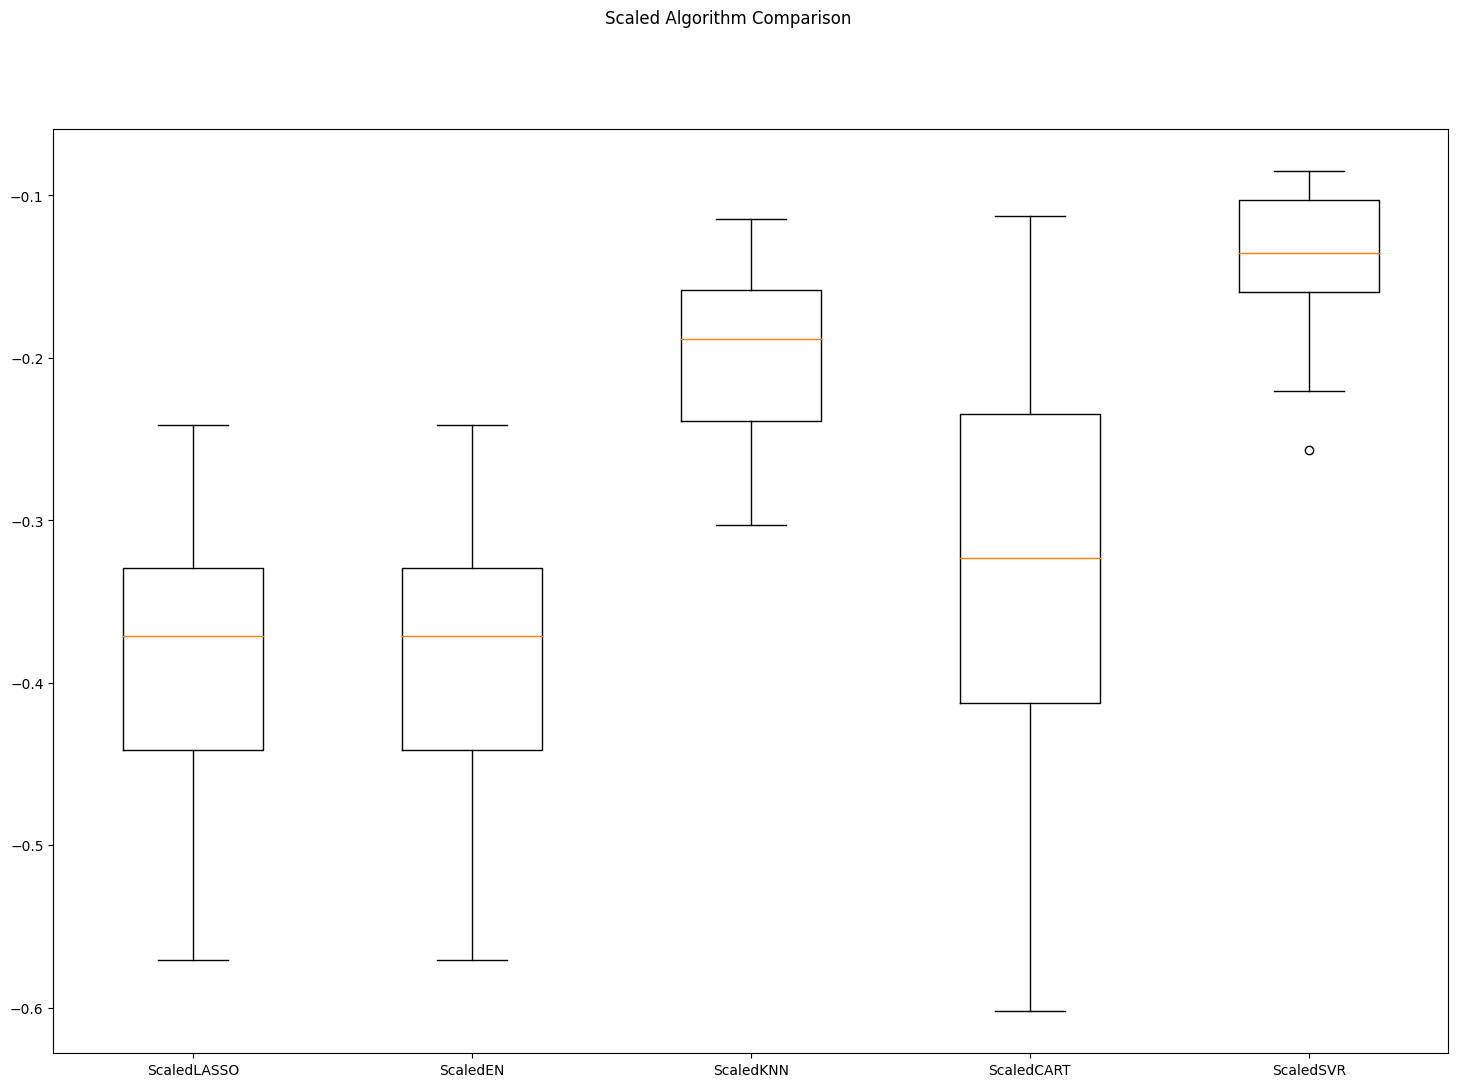

In [34]:
# Visualizing the results from the standardized dataset
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(ScaledResults)
ax.set_xticklabels(ScaledNames)
plt.show()

In [35]:
# Ensemble methods
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))

EnsemblesResults = []
EnsemblesNames = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    EnsemblesResults.append(cv_results)
    EnsemblesNames.append(name)
    message = '{0}: {1} ({2})'.format(name, cv_results.mean(), cv_results.std())
    print(message)

ScaledAB: -0.24219266848552215 (0.061674889528291366)
ScaledGBM: -0.10652166721345255 (0.04209434683826708)
ScaledRF: -0.12905143439006284 (0.06226774192757802)
ScaledET: -0.11393225141069385 (0.058375165011630606)


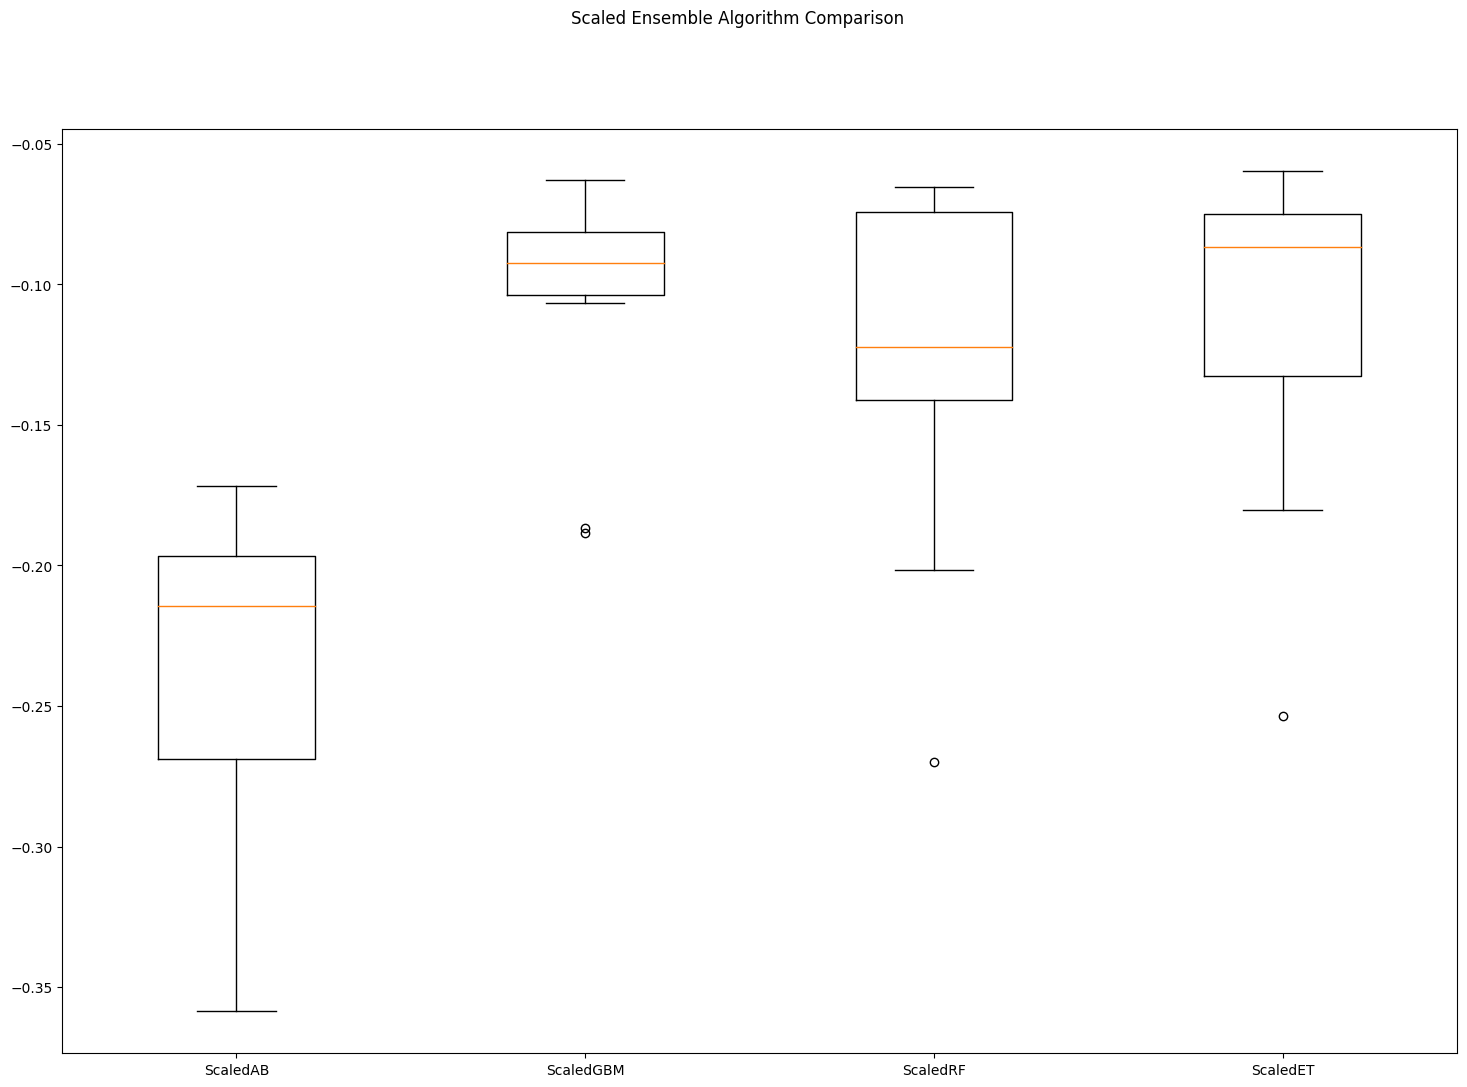

In [36]:
# Visualize the results from the ensemble algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(EnsemblesResults)
ax.set_xticklabels(EnsemblesNames)
plt.show()

In [59]:
#Calculating RMSE


X = array[:, 1:82]
Y = array[:, 1:58]
from sklearn.metrics import mean_squared_error
from math import sqrt


sqrt(mean_squared_error(X, Y))

0.0

In [61]:
#Calculationg MAE
from sklearn.metrics import mean_absolute_error as mae
X = array[:, 1:82]
Y = array[:, 1:58]
error = mae(X,Y)
print("Mean absolute error : " + str(error))

Mean absolute error : 0.0


In [37]:
# Scaling the data for optimization
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)

In [40]:
# Finalizing the model
model = GradientBoostingRegressor(min_samples_split=8, max_depth=4, min_samples_leaf=40)
model.fit(rescaledX_train, Y_train)

# ... and see how the model performs against the validation set
rescaledX_validation = scaler.transform(X_validation)

Predictions = model.predict(rescaledX_validation)

print(mean_squared_error(Y_validation, Predictions))


1.9078627570141147


The model needs a significant improvement.

In [41]:
# Converting the Financial Distress values to a "Healthy/Distressed" results
FinalPredictions = []
Validations = []
for i in Predictions:
    if i > -0.5:
        FinalPredictions.append(0)
    else:
        FinalPredictions.append(1)
for i in Y_validation:
    if i > -0.5:
        Validations.append(0)
    else:
        Validations.append(1)

In [42]:
# Analyzing the performance of the model using a confusion matrix
y_true = pd.Series(Validations)
y_prediction = pd.Series(FinalPredictions)
crsTab = pd.crosstab(y_true, y_prediction, rownames=['True'], colnames=['Predicted'], margins=True)
print(crsTab)

Predicted     0   1   All
True                     
0          1017  18  1035
1            29  38    67
All        1046  56  1102


Predictions for the financially distressed companies are not good. This is most-likely due to the unbalanced data. Potential solutions are to use different performance measurement (Precision, Recall, F-score, Kappa, etc.), and/or to resample the dataset to balance (sampling with replacements).